In [20]:
#importowanie bibliotek
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras
from keras import layers
import numpy as np
import pandas as pd

In [21]:
#wczytanie danych
data = pd.read_csv("C:/Users/jakub/Desktop/studia/Sieci_neuronowe/Depression_Student_Dataset.csv")
data = pd.DataFrame(data)


In [22]:
#modelowanie danych
data = pd.get_dummies(data, columns = ['Sleep Duration', 'Dietary Habits'])
colums_to_convert = ['Sleep Duration_5-6 hours', 'Sleep Duration_7-8 hours', 'Sleep Duration_Less than 5 hours', 'Sleep Duration_More than 8 hours', 'Dietary Habits_Healthy', 'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy']
data[colums_to_convert] = data[colums_to_convert].astype(int)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
data['Depression'] = data['Depression'].map({'Yes': 1, 'No': 0})

In [23]:
data_scaled = data.copy()
for column in data_scaled.columns:
    data_scaled[column] = (data_scaled[column] - data_scaled[column].min())/(data_scaled[column].max() - data_scaled[column].min())
data_scaled


Gender     Age  Academic Pressure  Study Satisfaction  \
0       1.0  0.6250               0.25                0.75   
1       1.0  0.6250               0.75                1.00   
2       1.0  0.4375               0.00                0.50   
3       1.0  0.3125               0.00                0.75   
4       0.0  0.8125               0.00                1.00   
..      ...     ...                ...                 ...   
497     1.0  0.5000               1.00                0.25   
498     1.0  0.3750               0.25                0.00   
499     0.0  0.3125               0.50                1.00   
500     1.0  0.9375               0.75                0.75   
501     1.0  0.0000               1.00                0.50   

     Have you ever had suicidal thoughts ?  Study Hours  Financial Stress  \
0                                      1.0     0.750000              0.25   
1                                      1.0     0.583333              0.00   
2                                      1.0     0.833333              0.75   
3                                      1.0     0.583333              0.25   
4                                      1.0     0.333333              0.25   
..                                     ...          ...               ...   
497                                    0.0     0.666667              0.50   
498                                    1.0     0.666667              1.00   
499                                    0.0     0.083333              1.00   
500                                    0.0     0.666667              0.00   
501                                    0.0     0.500000              0.25   

     Family History of Mental Illness  Depression  Sleep Duration_5-6 hours  \
0                                 1.0         0.0                       0.0   
1                                 1.0         0.0                       1.0   
2                                 0.0         1.0                       1.0   
3                                 1.0         0.0                       0.0   
4                                 1.0         0.0                       0.0   
..                                ...         ...                       ...   
497                               0.0         1.0                       0.0   
498                               0.0         1.0                       0.0   
499                               1.0         0.0                       1.0   
500                               1.0         0.0                       0.0   
501                               1.0         1.0                       0.0   

     Sleep Duration_7-8 hours  Sleep Duration_Less than 5 hours  \
0                         1.0                               0.0   
1                         0.0                               0.0   
2                         0.0                               0.0   
3                         0.0                               0.0   
4                         0.0                               0.0   
..                        ...                               ...   
497                       0.0                               0.0   
498                       0.0                               1.0   
499                       0.0                               0.0   
500                       0.0                               0.0   
501                       0.0                               0.0   

     Sleep Duration_More than 8 hours  Dietary Habits_Healthy  \
0                                 0.0                     0.0   
1                                 0.0                     1.0   
2                                 0.0                     0.0   
3                                 1.0                     0.0   
4                                 1.0                     1.0   
..                                ...                     ...   
497                               1.0                     0.0   
498                               0.0                     0.0

In [24]:
X = data_scaled.drop(columns=['Depression'])
Y = data_scaled['Depression']

In [25]:

test_size = 0.2
indices = np.random.permutation(len(X))
test_set_size = int(len(X)*test_size)

In [26]:
train_set = indices[test_set_size:]
test_set = indices[:test_set_size]

X_train = X.iloc[train_set]
X_test = X.iloc[test_set]

Y_train = Y.iloc[train_set]
Y_test = Y.iloc[test_set]
Y_test

126    1.0
479    1.0
195    0.0
303    1.0
245    0.0
      ... 
358    0.0
347    1.0
189    1.0
283    0.0
425    1.0
Name: Depression, Length: 100, dtype: float64

In [27]:
model = keras.Sequential()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [28]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3430 - loss: 0.7679  
Test Loss: 0.7628037333488464
Test Accuracy: 0.36000001430511475


In [29]:
# Tworzenie klasy callback, pozwalajacej na dynamiczne wczytywanie wartosci wag
from keras.callbacks import Callback
class WeightLogger(Callback):
    def __init__(self):
        super().__init__()
        self.weights_history = []

    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.get_weights()
        self.weights_history.append(weights)


In [30]:
import matplotlib.pyplot as plt
loss_mean = 0
accuracy_mean = 0

Trenowanie z batch_size = 32
Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4159 - loss: 0.7532 - val_accuracy: 0.4300 - val_loss: 0.7226
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5466 - loss: 0.6942 - val_accuracy: 0.5500 - val_loss: 0.6927
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6437 - loss: 0.6639 - val_accuracy: 0.6400 - val_loss: 0.6614
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6753 - loss: 0.6329 - val_accuracy: 0.7000 - val_loss: 0.6371
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7270 - loss: 0.6108 - val_accuracy: 0.7200 - val_loss: 0.6139
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7891 - loss: 0.5733 - val_accuracy: 0.7500 - val_loss: 0.5862
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7990 - loss: 0.5486 - val_accuracy: 0.7800 - val_loss: 0.5560
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8072 - loss: 0.52

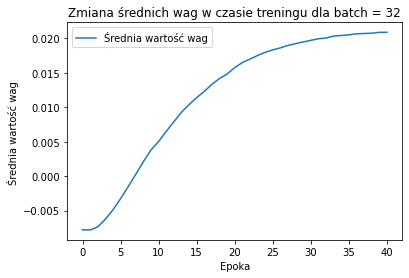

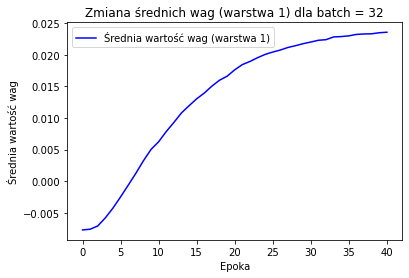

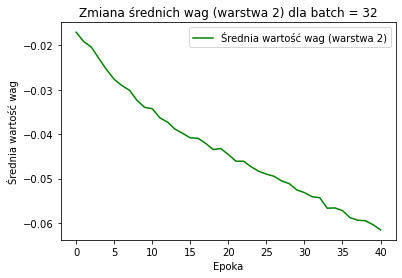

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


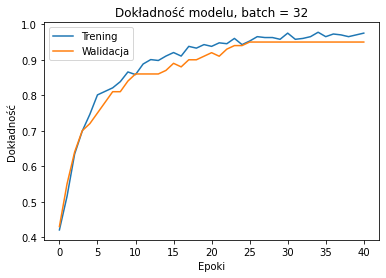

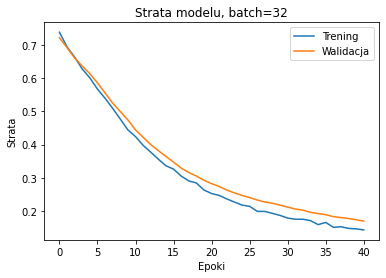

Dokładność dla batch = 32: 0.949999988079071
Strata dla batch = 32: 0.16874141991138458
Trenowanie z batch_size = 64
Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9476 - loss: 0.2044 - val_accuracy: 0.9500 - val_loss: 0.2366
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9378 - loss: 0.2171 - val_accuracy: 0.9500 - val_loss: 0.2334
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9388 - loss: 0.2132 - val_accuracy: 0.9400 - val_loss: 0.2306
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9630 - loss: 0.1915 - val_accuracy: 0.9400 - val_loss: 0.2277
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9568 - loss: 0.1916 - val_accuracy: 0.9500 - val_loss: 0.2233
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9655 - loss: 0.1800 - val_accuracy: 0.9500 - val_loss: 0.2198
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9565 - loss: 0.1855 - val_accuracy: 0.9500 - val_loss: 0.2167
E

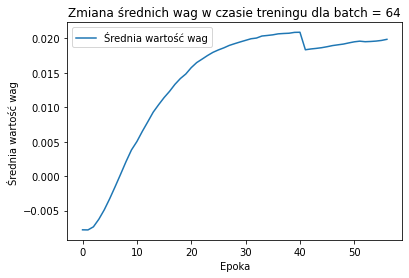

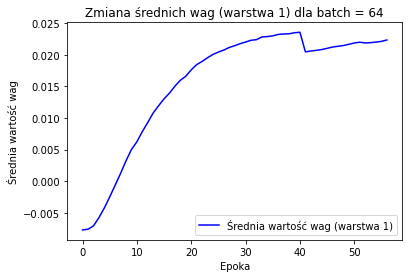

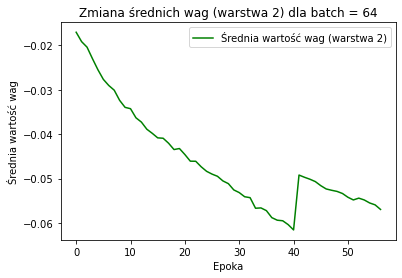

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


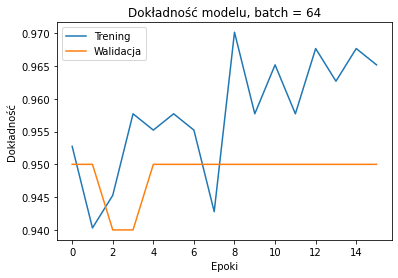

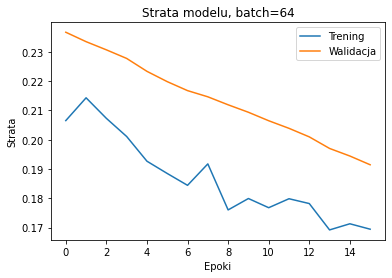

Dokładność dla batch = 64: 0.949999988079071
Strata dla batch = 64: 0.1914418339729309
Trenowanie z batch_size = 128
Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9442 - loss: 0.2108 - val_accuracy: 0.9500 - val_loss: 0.2349
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9551 - loss: 0.2043 - val_accuracy: 0.9500 - val_loss: 0.2333
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9616 - loss: 0.2030 - val_accuracy: 0.9400 - val_loss: 0.2321
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9608 - loss: 0.1959 - val_accuracy: 0.9500 - val_loss: 0.2307
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9453 - loss: 0.1999 - val_accuracy: 0.9500 - val_loss: 0.2288
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9583 - loss: 0.1946 - val_accuracy: 0.9400 - val_loss: 0.2276
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9522 - loss: 0.1916 - val_accuracy: 0.9400 - val_loss: 0.2260
E

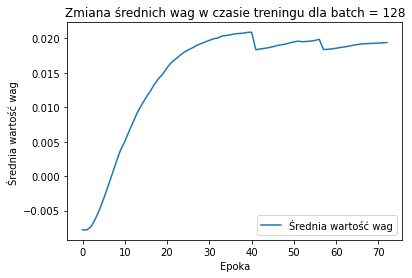

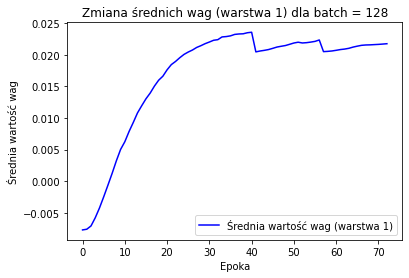

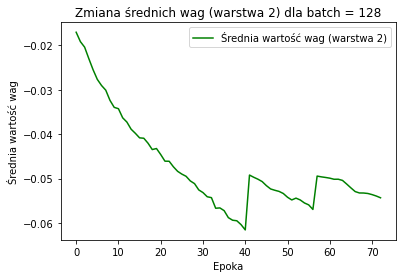

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


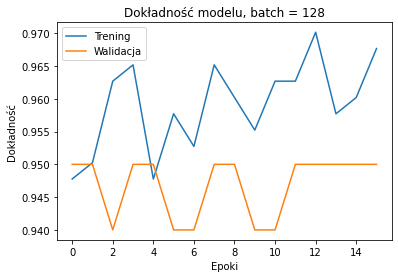

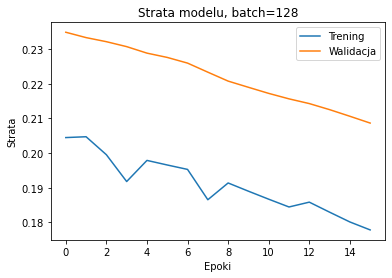

Dokładność dla batch = 128: 0.949999988079071
Strata dla batch = 128: 0.20865333080291748
Średnia strata dla wszystkich wartosci batch: 0.18961219489574432
Średnia dokładność dla wszystkich wartosci batch: 0.949999988079071


In [31]:
weight_logger = WeightLogger()
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
cb = [weight_logger, early_stopping]

for batch_size in [32, 64, 128]:
    print(f"Trenowanie z batch_size = {batch_size}")

    
    history = model.fit(X_train, Y_train, epochs=150, batch_size=batch_size, validation_data=(X_test, Y_test), callbacks=[cb])
    print(f"Trening zakończono po {len(weight_logger.weights_history)} epokach.")
    print(weight_logger.weights_history)
    average_weights_per_epoch = []
    layer1_avg_weights_per_epoch = []
    layer2_avg_weights_per_epoch = []
    for epoch_weights in weight_logger.weights_history:
        
        flattened_weights = np.concatenate([layer.flatten() for layer in epoch_weights])
        # Obliczanie średniej
        average_weights = np.mean(flattened_weights)
        average_weights_per_epoch.append(average_weights)
        layer1_weights = epoch_weights[0]  # Wagi pierwszej warstwy
        layer2_weights = epoch_weights[2]  # Wagi drugiej warstwy

        # Obliczanie średnich wag dla każdej warstwy
        layer1_avg_weights = np.mean(layer1_weights)
        layer2_avg_weights = np.mean(layer2_weights)

        # Dodawanie wyników do list
        layer1_avg_weights_per_epoch.append(layer1_avg_weights)
        layer2_avg_weights_per_epoch.append(layer2_avg_weights)

# średnia wag dla każdej epoki
    

    epochs = range(len(average_weights_per_epoch))

    plt.plot(epochs, average_weights_per_epoch, label=f'Średnia wartość wag')
    plt.xlabel('Epoka')
    plt.ylabel('Średnia wartość wag ')
    plt.title(f'Zmiana średnich wag w czasie treningu dla batch = {batch_size}')
    plt.legend()
    plt.show()

    epochs = range(len(layer1_avg_weights_per_epoch))
    plt.plot(epochs, layer1_avg_weights_per_epoch, label='Średnia wartość wag (warstwa 1)', color='blue')
    plt.xlabel('Epoka')
    plt.ylabel('Średnia wartość wag')
    plt.title(f'Zmiana średnich wag (warstwa 1) dla batch = {batch_size}')
    plt.legend()
    plt.show()

    plt.plot(epochs, layer2_avg_weights_per_epoch, label='Średnia wartość wag (warstwa 2)', color='green')
    plt.xlabel('Epoka')
    plt.ylabel('Średnia wartość wag')
    plt.title(f'Zmiana średnich wag (warstwa 2) dla batch = {batch_size}')
    plt.legend()
    plt.show()

    Y_pred = model.predict(X_test)
# Wykres dokładności na zbiorze treningowym i walidacyjnym
    plt.plot(history.history['accuracy'], label='Trening')
    plt.plot(history.history['val_accuracy'], label='Walidacja')
  
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.title(f'Dokładność modelu, batch = {batch_size}')
    plt.legend()
    plt.show()

# Wykres straty na zbiorze treningowym i walidacyjnym
    plt.plot(history.history['loss'], label='Trening')
    plt.plot(history.history['val_loss'], label='Walidacja')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.title(f'Strata modelu, batch={batch_size}')
    plt.legend()
    plt.show()
    print(f"Dokładność dla batch = {batch_size}: {history.history['val_accuracy'][-1]}")
    print(f"Strata dla batch = {batch_size}: {history.history['val_loss'][-1]}")
    loss_mean += history.history['val_loss'][-1]
    accuracy_mean += history.history['val_accuracy'][-1]


print(f'Średnia strata dla wszystkich wartosci batch: {loss_mean/3}')
print(f'Średnia dokładność dla wszystkich wartosci batch: {accuracy_mean/3}')


In [32]:
#zapisanie modelu
model.save('depresja.keras')

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [34]:
Y_pred = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


0.9882828282828282


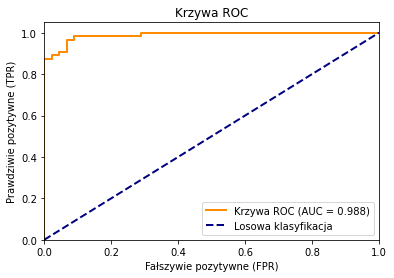

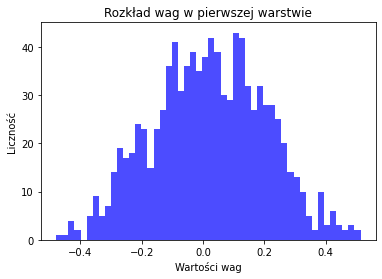

In [35]:
Y_test = np.array(Y_test)
Y_pred = np.array(Y_pred).flatten()  

# Obliczenie ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Krzywa ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Losowa klasyfikacja')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Fałszywie pozytywne (FPR)')
plt.ylabel('Prawdziwie pozytywne (TPR)')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

# %%
# Pobranie wag pierwszej warstwy
weights, biases = model.layers[0].get_weights()

# Wizualizacja wag jako histogram
plt.hist(weights.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Rozkład wag w pierwszej warstwie')
plt.xlabel('Wartości wag')
plt.ylabel('Liczność')
plt.show()

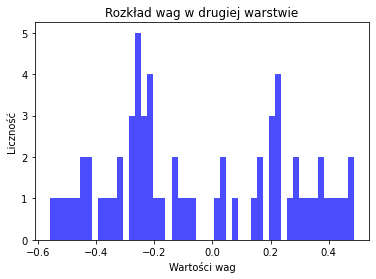

In [36]:
weights2, biases2 = model.layers[2].get_weights()


plt.hist(weights2.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Rozkład wag w drugiej warstwie')
plt.xlabel('Wartości wag')
plt.ylabel('Liczność')
plt.show()

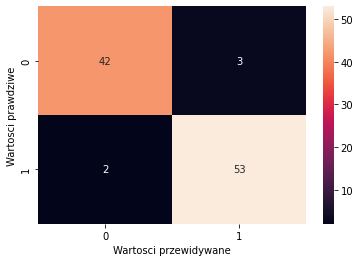

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred_classes = (Y_pred > 0.5).astype(int)
cm = confusion_matrix(Y_test, Y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Wartosci przewidywane')
plt.ylabel('Wartosci prawdziwe')
plt.show()
